C= [-0.10518387+0.j         -0.10518387+0.28408949j -0.10518387+0.1085587j
 -0.10518387+0.04437672j -0.10518387+0.j         -0.10518387-0.04437672j
 -0.10518387-0.1085587j  -0.10518387-0.28408949j]
A= [-0.10518387 -0.21036775 -0.21036775 -0.21036775]
B= [-0.         -0.56817897 -0.2171174  -0.08875343]


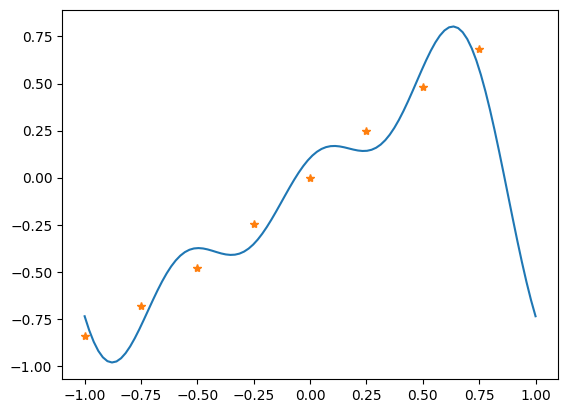

<Figure size 640x480 with 0 Axes>

In [6]:
import numpy as np 
from numpy import pi as PI
#FAST FOURIER IG
def fft1(f,N):
  w=np.exp(-2*PI*1j/N)
  C = np.zeros( (N,),dtype=complex)
  xx=np.linspace(0,2*PI*(N-1.0)/N,N)
  C[:]=f(xx)
  D=np.zeros_like(C)
  Z=np.array([w**k for k in range(N)])
  for n in range(m):
    for k in range(2**(m-n-1)):
      for j in range(2**(n)):
        u=C[2**n * k + j]
        v = Z[j*2**(m-n-1)]*C[2**n * k + 2**(m-1) + j]
        D[2**(n+1) * k + j] = (u+v)/2
        D[2**(n+1) * k + j + 2**n] = (u-v)/2
    C[:] = D[:]    
  return C

g = lambda x: np.sin(x) 
a=-1
b=1
z = lambda x: a+x*(b-a)/(2*PI)
f = lambda x: g(z(x))
m=3
N=2**m
C=fft1(f,N)
print("C=",C)
A=2*C[0:N//2].real
A[0] = 0.5*A[0]
B = -2*C[0:N//2].imag
print("A=",A)
print("B=",B)

import matplotlib.pyplot as plt
xx = np.linspace(0,2*PI,100)
yy = sum([(A[k]*np.cos(k*xx) + B[k]*np.sin(k*xx))[:,None] for k in range(len(A))])
tt = np.linspace(0,2*PI*(N-1.0)/N,N)
plt.plot(z(xx),yy,z(tt),f(tt),'*')
plt.show()
plt.clf()

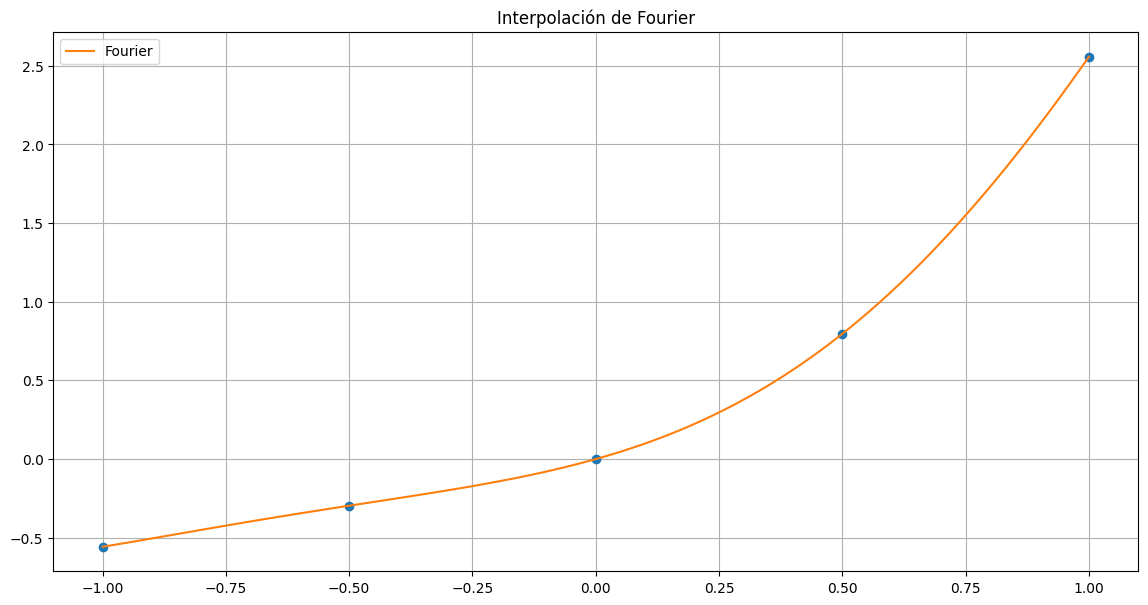


XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
Interpolación de Fourier (trigonométrica)
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Los puntos con los que se trabajan son
X = [-1.  -0.5  0.   0.5  1. ]
Y = [-0.55740772 -0.29630249  0.          0.79630249  2.55740772]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
La matriz (M) de cosenos y senos:
[[ 1.          0.54030231 -0.41614684 -0.84147098 -0.90929743]
 [ 1.          0.87758256  0.54030231 -0.47942554 -0.84147098]
 [ 1.          1.          1.          0.          0.        ]
 [ 1.          0.87758256  0.54030231  0.47942554  0.84147098]
 [ 1.          0.54030231 -0.41614684  0.84147098  0.90929743]]

La matriz de coeficientes (a) para la serie de cosenos:
[ 2.58602837 -2.78341606  0.19738768]

La matriz de coeficientes (b) para la serie de senos:
[ 0.          2.99030965 -1.05449664]

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
El polinomio trigonométrico que interpola

'IMPRESIÓN COMPLETADA'

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import pandas as pd


######################################################
# Matrices
##El profe inicia x1,x2,...,x2*n+1; pero nosotros x0,x1,...,x2n.
##I make b0,b1,...,bn, with b0 = 0
######################################################
def preFourier(X, Y):
    if len(X) % 2 == 0:
        return 'Even number of points'
    else:
        pass
    n = (len(X) - 1) // 2
    coefa = np.zeros(n + 1)
    coefb = np.zeros(n)

    M = np.zeros((2 * n + 1, 2 * n + 1))
    for j in range(n + 1):
        for i in range(2 * n + 1):
            M[i][j] = np.cos(j * X[i])
    for j in range(n + 1, 2 * n + 1):
        for i in range(2 * n + 1):
            aux = j - n
            M[i][j] = np.sin(aux * X[i])

    coef = np.dot(np.linalg.inv(M), np.transpose(Y))
    coef = np.array(coef)
    for i in range(n + 1):
        coefa[i] = coef[i]
    for i in range(n):
        coefb[i] = coef[n + 1 + i]
    coefb = np.concatenate((np.zeros(1), coefb))

    return M, coefa, coefb


######################################################
# Fourier interpolacion de puntos
######################################################
def symFourier(X, Y):
    n = (len(X) - 1) // 2
    a = preFourier(X, Y)[1]
    b = preFourier(X, Y)[2]
    sumcos = a[0]
    sumsin = 0
    for k in range(1, n + 1):
        sumcos = sumcos + a[k] * sym.Symbol('cos({}x)'.format(k))
        sumsin = sumsin + b[k] * sym.Symbol('sin({}x)'.format(k))
    return sumcos + sumsin


def Fourier(X, Y, x):
    n = (len(X) - 1) // 2
    a = preFourier(X, Y)[1]
    b = preFourier(X, Y)[2]
    sumcos = a[0]
    sumsin = 0
    for k in range(1, n + 1):
        sumcos = sumcos + a[k] * np.cos(k * x)
        sumsin = sumsin + b[k] * np.sin(k * x)
    return sumcos + sumsin


######################################################
# Fourier interpolacion de función dada. Porseaca, sino ignorar
######################################################
def symFourierab(X, Y, a, b):
    n = (len(X) - 1) // 2
    sumcos = a[0]
    sumsin = 0
    for k in range(1, n + 1):
        sumcos = sumcos + a[k] * sym.Symbol('cos({}x)'.format(k))
        sumsin = sumsin + b[k] * sym.Symbol('sin({}x)'.format(k))
    return sumcos + sumsin


def Fourierab(X, Y, a, b, x):
    n = (len(X) - 1) // 2
    sumcos = a[0]
    sumsin = 0
    for k in range(1, n + 1):
        sumcos = sumcos + a[k] * np.cos(k * x)
        sumsin = sumsin + b[k] * np.sin(k * x)
    return sumcos + sumsin


######################################################
# Impresora de pasos realizados, para la jusificación que Leopoldo pide
######################################################
def impFourier(X, Y):
    n = len(X) - 1
    print()
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print('Interpolación de Fourier (trigonométrica)')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print('Los puntos con los que se trabajan son')
    print('X = {}'.format(X))
    print('Y = {}'.format(Y))
    print()
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print('La matriz (M) de cosenos y senos:')
    print(preFourier(X, Y)[0])
    print()
    print('La matriz de coeficientes (a) para la serie de cosenos:')
    print(preFourier(X, Y)[1])
    print()
    print('La matriz de coeficientes (b) para la serie de senos:')
    print(preFourier(X, Y)[2])
    print()
    print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
    print('El polinomio trigonométrico que interpola los {} + 1 puntos es'.format(n))
    print(symFourier(X, Y))
    return 'IMPRESIÓN COMPLETADA'


######################################################
# Graficadora
######################################################
def grafFourier(muestra, X, Y):
    plt.figure(figsize=(14, 7))
    plt.grid()
    plt.plot(X, Y, 'o')
    ejex = np.linspace(X[0], X[-1], muestra)
    ejey = np.zeros(muestra)
    for i in range(muestra):
        ejey[i] = Fourier(X, Y, ejex[i])
    plt.plot(ejex, ejey, label='Fourier')
    plt.legend()
    plt.title('Interpolación de Fourier')
    plt.show()


######################################################
# PARA EL EXAMEN
######################################################
# INGRESAR DATOS
# IMPORTANTE. DEBE HABER UNA CANTIDAD IMPAR DE PUNTOS!!!!!!!!!!!!!!!! Añadirle un punto a mano

x1 = np.array([4, 5, 7, 21, 30, 50, 51])
y1 = np.array([20, 30, 60, -12, 41, 87, 41])

x2 = np.linspace(-1,1,5)
y2 = x2**2+np.tan(x2)

X = x2
Y = y2

muestra = 100
grafFourier(muestra, X, Y)
impFourier(X, Y)